# Telecom company data Churn (how many customer left)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("telecom_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Data Cleaning 

In [7]:
df.head(6)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
# df.duplicated().sum()
df["customerID"].duplicated().sum()

np.int64(0)

### Senior citizen column data will change 0-1 to yes-no 

In [12]:
def conv(value):
    if value == 0 :
        return "no"
    else :
        return "yes"
df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)

In [13]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,no,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,no,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,no,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,no,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


## Data Analyzing

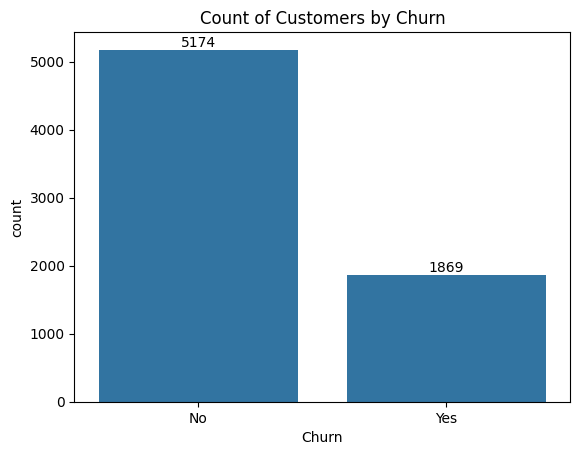

In [14]:
ax=sns.countplot(x="Churn",data=df)
ax.bar_label(ax.containers[0]) ## shows label
plt.title("Count of Customers by Churn")
plt.show()

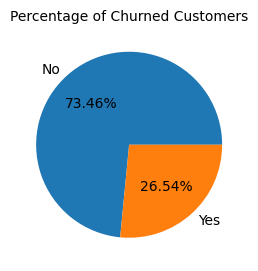

In [15]:
plt.figure(figsize=(3,4))
gb=df.groupby("Churn").agg({'Churn':'count'})
# gb
plt.pie(gb['Churn'],labels=gb.index,autopct="%1.2f%%")
plt.title("Percentage of Churned Customers",fontsize=10)
plt.show()

### From the given pie chart we can conclude that 26.54% of our customers have churned out 
### Now lets explore the reason behind it

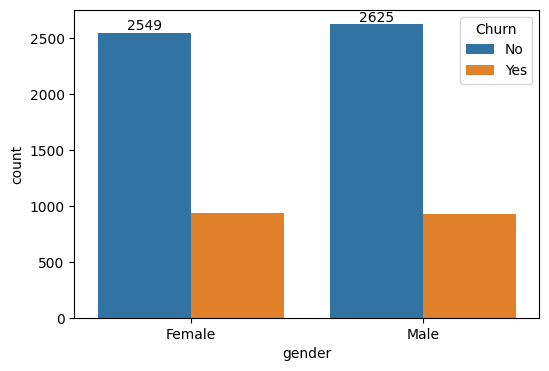

In [16]:
plt.figure(figsize=(6,4))
gen=sns.countplot(x="gender",data=df,hue="Churn")
gen.bar_label(gen.containers[0])
plt.show()

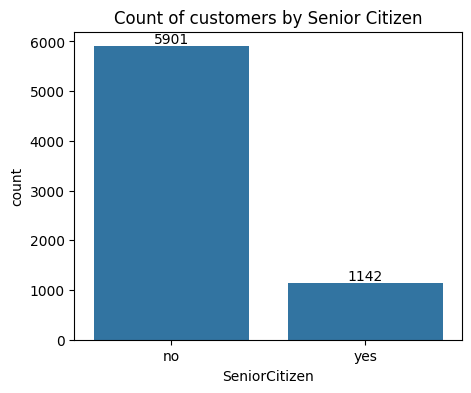

In [17]:
plt.figure(figsize=(5,4))
gen=sns.countplot(x="SeniorCitizen",data=df)
plt.title("Count of customers by Senior Citizen") 
gen.bar_label(gen.containers[0])
plt.show()

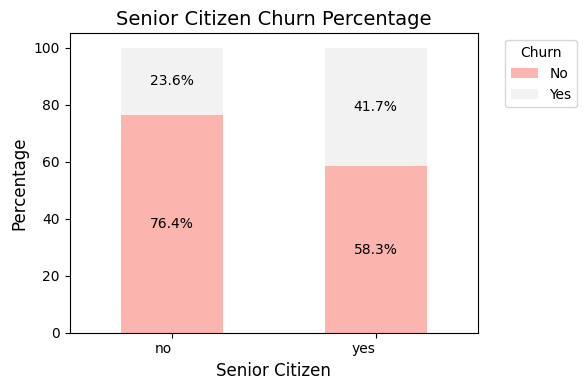

In [18]:
# Calculate percentages for stacking
pivot_table = df.pivot_table(
    index="SeniorCitizen", columns="Churn", aggfunc="size", fill_value=0
)

# Normalize to get percentages
percentages = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(6, 4))
percentages.plot(kind="bar", stacked=True, ax=ax, colormap="Pastel1")

# Add percentage labels
for bar_group in ax.containers:
    for bar in bar_group:
        # Add labels to the middle of each bar
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f"{height:.1f}%",
                ha="center",
                va="center",
                fontsize=10,
                color="black",
            )

# Customize the chart
ax.set_title("Senior Citizen Churn Percentage", fontsize=14)
ax.set_xlabel("Senior Citizen", fontsize=12)
ax.set_ylabel("Percentage", fontsize=12)
ax.legend(title="Churn", bbox_to_anchor=(1.05, 1), loc="upper left") #bbox_to_anchor is used to shift(x-axis,y-axis)

# Change rotation of x and y labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")  # X-axis labels

plt.tight_layout() #automatically adjusts subplot params so that the subplot(s) fits in to the figure area

plt.show()

### Comparative a greated percentage of people in senior citizen category have churned

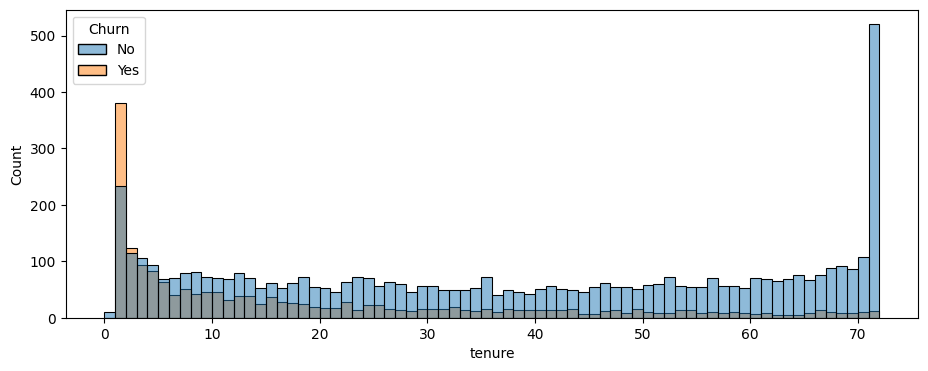

In [19]:
plt.figure(figsize=(11,4))
sns.histplot(x="tenure",data=df,bins=72,hue="Churn")
plt.show()

### People who have used our services for a long time have stayed and peoplr who have used our service #1 or 2months have churned

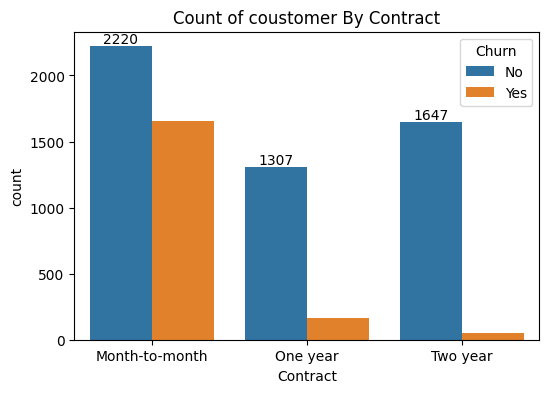

In [30]:
plt.figure(figsize=(6,4))
cont=sns.countplot(x="Contract",data=df,hue="Churn")
cont.bar_label(cont.containers[0])
plt.title("Count of coustomer By Contract")
plt.show()

### People who have month to month contrct are likely to churn then from those who have 1 or 2 year contract

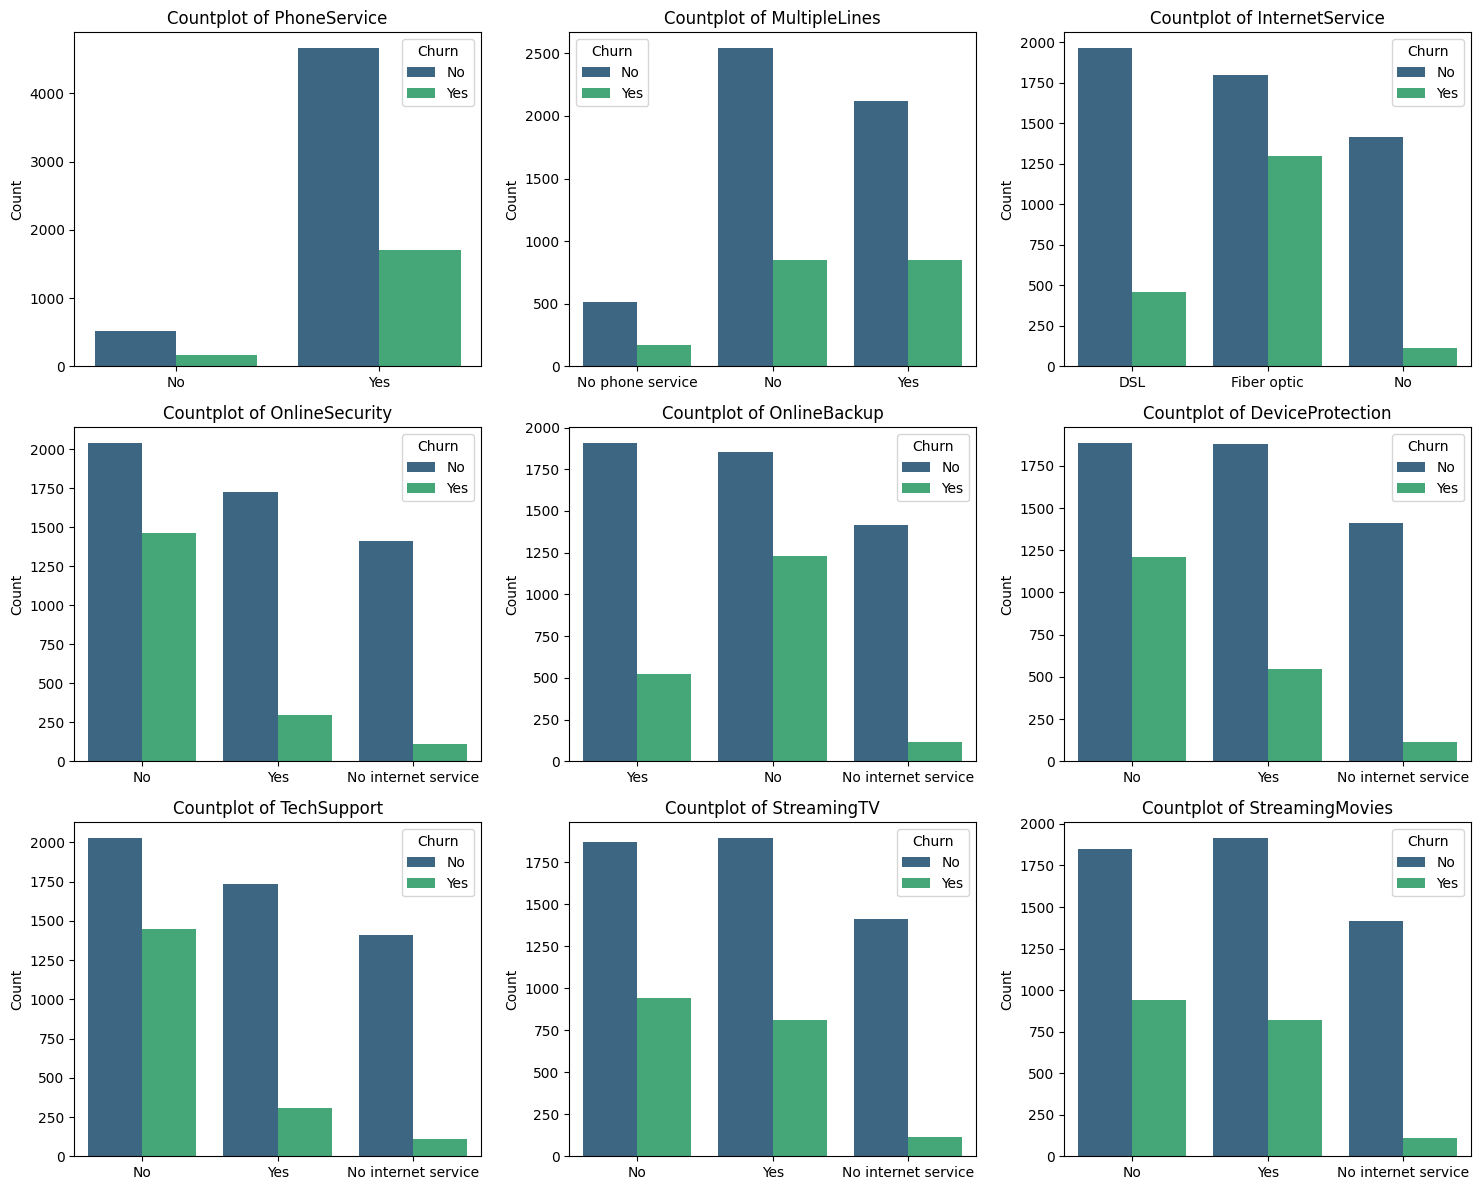

In [42]:
# Assuming 'df' is your DataFrame
columns = ['PhoneService', 'MultipleLines', 'InternetService', 
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

# Generate countplots for each column
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i],hue="Churn", palette='viridis')
    # sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Countplot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Hide any extra subplots if they exist
for j in range(len(columns), len(axes)):
    axes[j].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()


### Customers without internet services or advanced features like online security, fiber optics and backups seem more likely to churn. Streaming services also show some impact on customer retention.

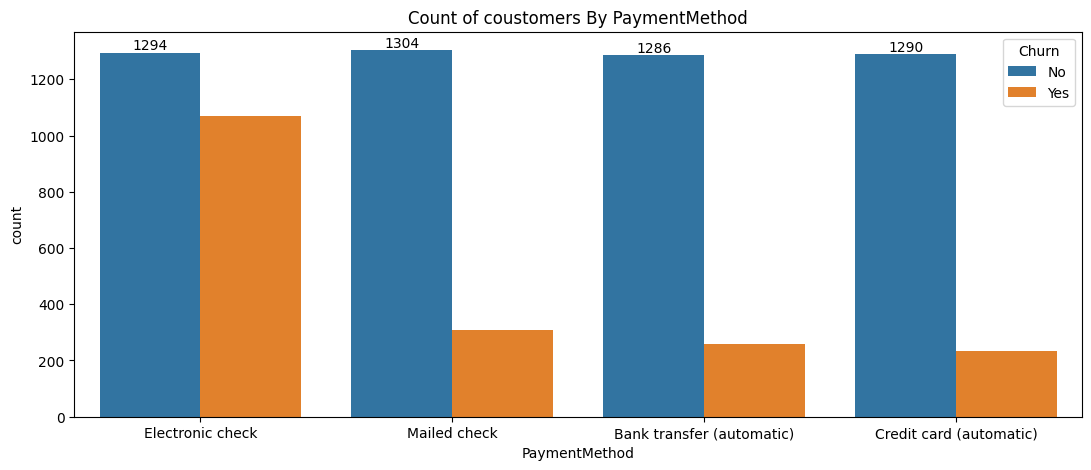

In [50]:
plt.figure(figsize=(13,5))
cont=sns.countplot(x="PaymentMethod",data=df,hue="Churn")
cont.bar_label(cont.containers[0])
plt.title("Count of coustomers By PaymentMethod")
plt.show()

### Customer is likely to churn when he is using electronics check as a payment method 